## Bibliotecas

In [94]:
import sklearn
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Análise Exploratória de Dados

In [5]:
df_ctr = pd.read_excel(r'C:\Users\lucas\OneDrive\Documentos\Case Mercantil\Case e Teórico_Políticas\Case e Teórico_Políticas\Base_Case_1.xlsx',
                   sheet_name='ctr', skiprows= 1)

In [8]:
df_ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11140 entries, 0 to 11139
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   chave                  11140 non-null  int64  
 1   Crédito contrato (R$)  11140 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 174.2 KB


In [7]:
df_ctr.shape

(11140, 2)

In [9]:
df_ctr[df_ctr['chave']==1022677]

,chave,Crédito contrato (R$)
88,1022677,409.179161
89,1022677,831.976888


In [10]:
df_ctr.rename(columns={'Crédito contrato (R$)':'credito_liberado'},inplace=True)

In [11]:
df_ctr

,chave,credito_liberado
0,101280,400.069068
1,104432,1861.468141
2,110108,1646.451649
3,115472,4322.064763
4,119280,203.791678
...,...,...
11135,97504833,643.352351
11136,97504969,1030.557494
11137,97513076,130.049136
11138,97513476,589.081774


In [12]:
df_ctr = df_ctr.groupby(['chave']).credito_liberado.agg(['sum','count']).rename(columns={'sum':'soma_ctr','count':'qtde_ctr'}).reset_index()

In [13]:
df_ctr

,chave,soma_ctr,qtde_ctr
0,101280,400.069068,1
1,104432,1861.468141,1
2,110108,1646.451649,1
3,115472,4322.064763,1
4,119280,203.791678,1
...,...,...,...
11009,97504833,643.352351,1
11010,97504969,1030.557494,1
11011,97513076,130.049136,1
11012,97513476,589.081774,1


In [14]:
df_ctr[(df_ctr['chave']==1022677)]

,chave,soma_ctr,qtde_ctr
88,1022677,1241.156049,2


In [15]:
df_pgto = pd.read_excel(r'C:\Users\lucas\OneDrive\Documentos\Case Mercantil\Case e Teórico_Políticas\Case e Teórico_Políticas\Base_Case_1.xlsx',
                   sheet_name='pgto', skiprows= 1)

In [16]:
df_pgto.head()

,chave,Pagamentos Realizados (R$)
0,101280,262.023264
1,104432,888.106038
2,110108,1646.451649
3,115472,4322.064763
4,119280,203.791678


In [17]:
df_pgto.shape

(10801, 2)

In [18]:
df_pgto[df_pgto['chave']==1022677]

,chave,Pagamentos Realizados (R$)
86,1022677,409.179161
87,1022677,831.976888


In [19]:
df_pgto.rename(columns={'Pagamentos Realizados (R$)':'pgtos_realizados'},inplace=True)

In [20]:
df_pgto

,chave,pgtos_realizados
0,101280,262.023264
1,104432,888.106038
2,110108,1646.451649
3,115472,4322.064763
4,119280,203.791678
...,...,...
10796,97504833,652.732367
10797,97504969,1103.819712
10798,97513076,172.644171
10799,97513476,652.783509


In [21]:
df_pgto = df_pgto.groupby(['chave']).pgtos_realizados.agg(['sum','count']).rename(columns={'sum':'soma_pgto','count':'qtde_pgto'}).reset_index()

In [22]:
df_pgto

,chave,soma_pgto,qtde_pgto
0,101280,262.023264,1
1,104432,888.106038,1
2,110108,1646.451649,1
3,115472,4322.064763,1
4,119280,203.791678,1
...,...,...,...
10629,97504833,1296.084718,2
10630,97504969,2134.377206,2
10631,97513076,302.693308,2
10632,97513476,1241.865283,2


In [23]:
df_pgto[df_pgto['chave']==1022677]

,chave,soma_pgto,qtde_pgto
86,1022677,1241.156049,2


In [24]:
df_score = pd.read_excel(r'C:\Users\lucas\OneDrive\Documentos\Case Mercantil\Case e Teórico_Políticas\Case e Teórico_Políticas\Base_Case_1.xlsx',
                   sheet_name='modelagem', skiprows= 1)

In [25]:
df_score.head()

,chave,Score de crédito
0,101280,0.202772
1,104432,0.924722
2,110108,0.037231
3,115472,0.126221
4,119280,0.092397


In [26]:
df_score.shape

(10956, 2)

In [27]:
df_score.rename(columns={'Score de crédito':'score'},inplace=True)

In [28]:
df_score.head()

,chave,score
0,101280,0.202772
1,104432,0.924722
2,110108,0.037231
3,115472,0.126221
4,119280,0.092397


In [29]:
df_score = df_score.groupby(['chave']).score.agg(['max']).rename(columns={'max':'max_score'}).reset_index()

In [30]:
df_score['faixa_score'] = df_score['max_score'].apply(lambda x: np.where(x < 0.1,'0 a 10',
                                                            np.where(x < 0.2,'10 a 20',
                                                            np.where(x < 0.3,'20 a 30',
                                                            np.where(x < 0.4,'30 a 40',
                                                            np.where(x < 0.5,'40 a 50',
                                                            np.where(x < 0.6,'50 a 60',
                                                            np.where(x < 0.7,'60 a 70',
                                                            np.where(x < 0.8,'70 a 80',
                                                            np.where(x < 0.9,'80 a 90',
                                                            np.where(x < 1,'90 a 100','sem_classificacao')))))))))))

In [31]:
df_score

,chave,max_score,faixa_score
0,101280,0.202772,20 a 30
1,104432,0.924722,90 a 100
2,110108,0.037231,0 a 10
3,115472,0.126221,10 a 20
4,119280,0.092397,0 a 10
...,...,...,...
10828,97504833,0.733188,70 a 80
10829,97504969,0.556913,50 a 60
10830,97513076,0.286916,20 a 30
10831,97513476,0.341155,30 a 40


In [32]:
df_score[df_score['chave']==1022677]

,chave,max_score,faixa_score
87,1022677,0.642137,60 a 70


In [33]:
print('Tamanho da base de contratos:'+str(df_ctr.shape))
print('Tamanho da base de pagamentos:'+str(df_pgto.shape))
print('Tamanho da base de score:'+str(df_score.shape))

Tamanho da base de contratos:(11014, 3)
Tamanho da base de pagamentos:(10634, 3)
Tamanho da base de score:(10833, 3)


In [34]:
df_1 = pd.merge(df_ctr,df_pgto,how='left',on='chave')

In [35]:
df = pd.merge(df_1,df_score,how='left',on='chave')

In [36]:
df.head()

,chave,soma_ctr,qtde_ctr,soma_pgto,qtde_pgto,max_score,faixa_score
0,101280,400.069068,1,262.023264,1.0,0.202772,20 a 30
1,104432,1861.468141,1,888.106038,1.0,0.924722,90 a 100
2,110108,1646.451649,1,1646.451649,1.0,0.037231,0 a 10
3,115472,4322.064763,1,4322.064763,1.0,0.126221,10 a 20
4,119280,203.791678,1,203.791678,1.0,0.092397,0 a 10


In [37]:
df['soma_ctr'] = df['soma_ctr'].fillna(0)
df['soma_pgto'] = df['soma_pgto'].fillna(0)
df['max_score'] = df['max_score'].fillna('sem_score')
df['faixa_score'] = df['faixa_score'].fillna('sem_score')

In [38]:
df['saldo'] = df['soma_pgto']-df['soma_ctr']

In [39]:
df.to_excel(r'C:\Users\lucas\Downloads\df.xlsx',index=False)

In [40]:
df

,chave,soma_ctr,qtde_ctr,soma_pgto,qtde_pgto,max_score,faixa_score,saldo
0,101280,400.069068,1,262.023264,1.0,0.202772,20 a 30,-138.045804
1,104432,1861.468141,1,888.106038,1.0,0.924722,90 a 100,-973.362103
2,110108,1646.451649,1,1646.451649,1.0,0.037231,0 a 10,0.000000
3,115472,4322.064763,1,4322.064763,1.0,0.126221,10 a 20,0.000000
4,119280,203.791678,1,203.791678,1.0,0.092397,0 a 10,0.000000
...,...,...,...,...,...,...,...,...
11009,97504833,643.352351,1,1296.084718,2.0,0.733188,70 a 80,652.732367
11010,97504969,1030.557494,1,2134.377206,2.0,0.556913,50 a 60,1103.819712
11011,97513076,130.049136,1,302.693308,2.0,0.286916,20 a 30,172.644171
11012,97513476,589.081774,1,1241.865283,2.0,0.341155,30 a 40,652.783509


In [41]:
df1 = df.groupby('faixa_score').saldo.agg(['mean','count']).reset_index()

In [42]:
df1['perda/ganho'] = df1['mean']*df1['count']

In [43]:
df1['perda/ganho'].sum()

-1474983.3645904209

In [44]:
data = df1[['faixa_score','count']]

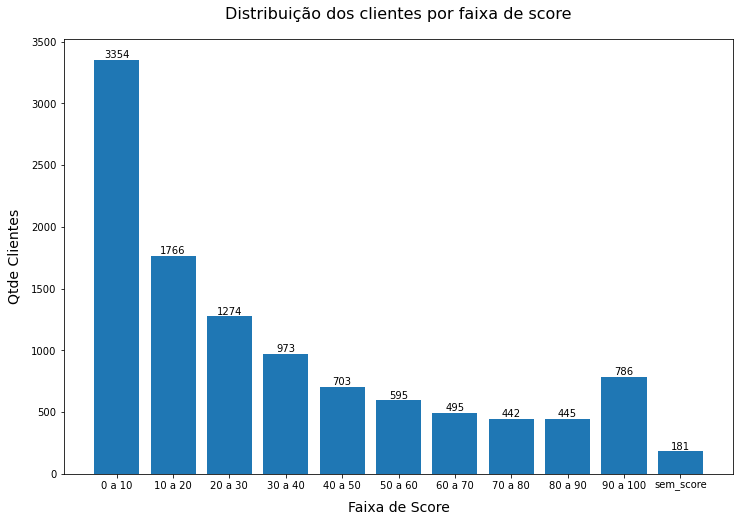

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(data["faixa_score"]))

# Plotando o gráfico da 1ª Unidade
grafico_1_unidade = ax.bar(x = x, height="count",  data=data) 
ax.set_title('Distribuição dos clientes por faixa de score', fontsize=16, pad=20)
ax.set_xlabel('Faixa de Score', fontsize=14, labelpad=10)
ax.set_ylabel('Qtde Clientes', fontsize=14, labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(data["faixa_score"])

# colocando o rótulo nas barras
ax.bar_label(grafico_1_unidade, fmt="%.f", size=10, label_type="edge")
plt.savefig('distribuicao.png');

In [46]:
df_cobranca = df[df['saldo']<0]

In [47]:
df_cobranca[df['saldo']<0]

,chave,soma_ctr,qtde_ctr,soma_pgto,qtde_pgto,max_score,faixa_score,saldo
0,101280,400.069068,1,262.023264,1.0,0.202772,20 a 30,-138.045804
1,104432,1861.468141,1,888.106038,1.0,0.924722,90 a 100,-973.362103
7,156862,1254.316924,1,1153.500040,1.0,0.457903,40 a 50,-100.816884
8,159125,2636.310473,1,2225.488310,1.0,0.199191,10 a 20,-410.822163
13,209099,1543.229343,1,0.000000,NaN,sem_score,sem_score,-1543.229343
...,...,...,...,...,...,...,...,...
10964,87776267,924.385126,1,784.999385,1.0,0.093264,0 a 10,-139.385741
10979,92949471,846.173845,1,743.164032,2.0,0.473024,40 a 50,-103.009813
10980,93426955,21.017623,1,1.117395,2.0,0.283475,20 a 30,-19.900228
10988,94513294,377.720930,1,91.314264,2.0,0.999531,90 a 100,-286.406666


In [48]:
df_cobranca.to_excel(r'C:\Users\lucas\Downloads\teste.xlsx', index=False)

In [49]:
df2 = df_cobranca.groupby('faixa_score').saldo.agg(['mean','count']).reset_index()

In [50]:
df2['potencial_perda'] = df2['mean']*df2['count']

In [51]:
df2['potencial_perda'].sum()

-1527617.7080979696

In [52]:
data = df2[['faixa_score','count']]

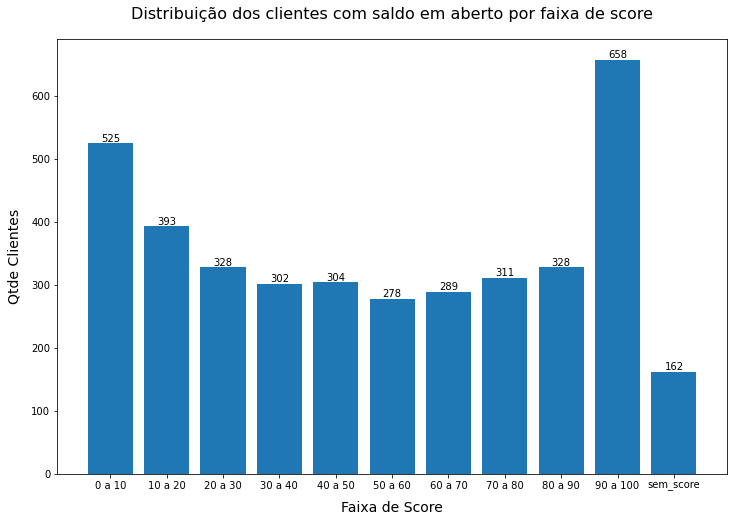

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(data["faixa_score"]))

# Plotando o gráfico da 1ª Unidade
grafico_1_unidade = ax.bar(x = x, height="count",  data=data) 
ax.set_title('Distribuição dos clientes com saldo em aberto por faixa de score', fontsize=16, pad=20)
ax.set_xlabel('Faixa de Score', fontsize=14, labelpad=10)
ax.set_ylabel('Qtde Clientes', fontsize=14, labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(data["faixa_score"])

# colocando o rótulo nas barras
ax.bar_label(grafico_1_unidade, fmt="%.f", size=10, label_type="edge")
plt.savefig('distribuicao_saldo_em_aberto.png');

In [54]:
data = df2[['faixa_score','mean']]

In [55]:
data['mean'] = data['mean']*(-1)

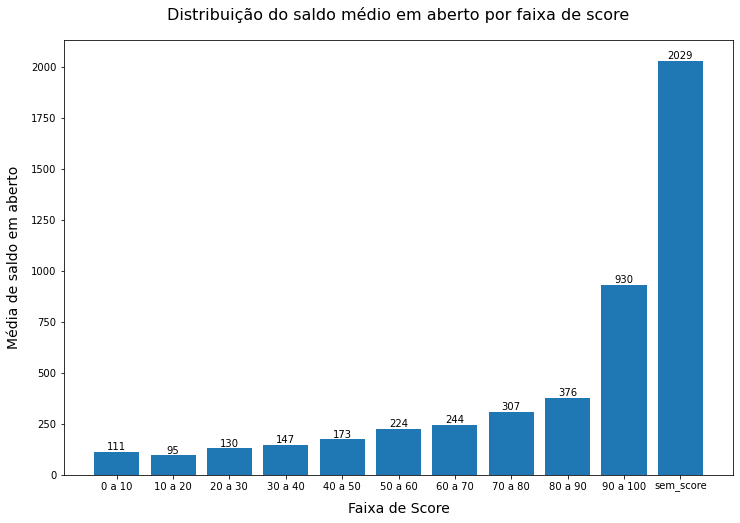

In [56]:
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(data["faixa_score"]))

# Plotando o gráfico da 1ª Unidade
grafico_1_unidade = ax.bar(x = x, height="mean",  data=data) 
ax.set_title('Distribuição do saldo médio em aberto por faixa de score', fontsize=16, pad=20)
ax.set_xlabel('Faixa de Score', fontsize=14, labelpad=10)
ax.set_ylabel('Média de saldo em aberto', fontsize=14, labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(data["faixa_score"])

# colocando o rótulo nas barras
ax.bar_label(grafico_1_unidade, fmt="%.f", size=10, label_type="edge")
plt.savefig('distribuicao_media_saldo_aberto.png');

In [57]:
data = df2[['faixa_score','potencial_perda']]

In [58]:
data['mean'] = data['potencial_perda']*(-1)

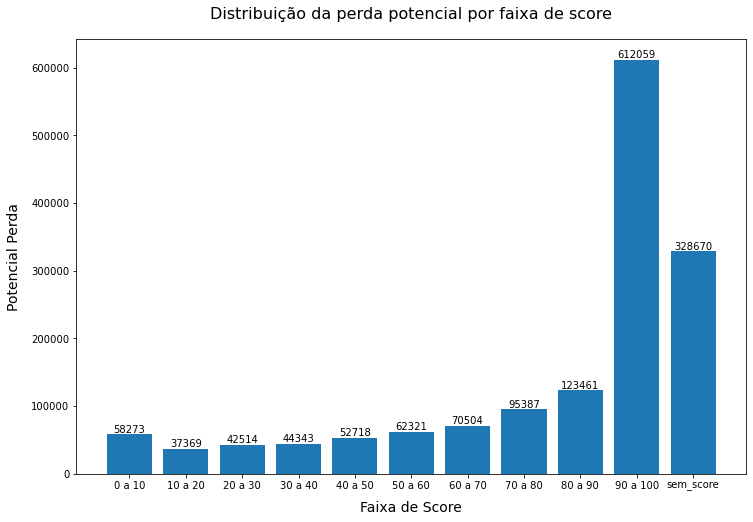

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(data["faixa_score"]))

# Plotando o gráfico da 1ª Unidade
grafico_1_unidade = ax.bar(x = x, height="mean",  data=data) 
ax.set_title('Distribuição da perda potencial por faixa de score', fontsize=16, pad=20)
ax.set_xlabel('Faixa de Score', fontsize=14, labelpad=10)
ax.set_ylabel('Potencial Perda', fontsize=14, labelpad=10)
ax.set_xticks(x)
ax.set_xticklabels(data["faixa_score"])

# colocando o rótulo nas barras
ax.bar_label(grafico_1_unidade, fmt="%.f", size=10, label_type="edge")
plt.savefig('distribuicao_potencial_perda.png');

In [60]:
df_model = df[df['max_score']!='sem_score']

In [121]:
X = np.array(df_model[['soma_ctr','max_score']])

In [125]:
X.shape

(10833, 2)

In [126]:
y = np.array(df_model['soma_pgto']).ravel() 

In [127]:
y.shape

(10833,)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [93]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [104]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [105]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

Coefficients: 
 [   0.76769236 -413.96511024]
Mean squared error: 95448.73
Coefficient of determination: 0.87


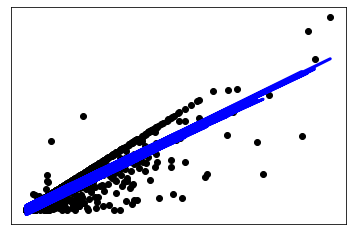

In [128]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test[:, 0], y_test, color="black")
plt.plot(X_test[:, 0], y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [103]:
# Visualizando o coeficiente angular
reg.coef_

array([   0.78516957, -415.01934173])

In [78]:
# Visualizando o coeficiente linear
reg.intercept_

176.07030798873484

In [74]:
# Aplicando o Predict e adicionando o resultado no Dataframe 


In [76]:
# Calculando o erro da reta e da regressão


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [75]:
model.predict(np.array([[1000,.3]]))

array([836.73407136])

## Conclusão